# Titanic

ใน Notebook เราจะทำการวิเคราะห์อย่างละเอียดเกี่ยวกับผู้โดยสารผลเรือ Titanic 

https://www.kaggle.com/datasets/yasserh/titanic-dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

---

การจมเรือไททานิคถือเป็นซากเรืออับปางที่โด่งดังที่สุดแห่งหนึ่งในประวัติศาสตร์

เมื่อวันที่ 15 เมษายน พ.ศ. 2455 ในระหว่างการเดินทางครั้งแรก เรือ RMS Titanic ที่ถือว่า "ไม่มีวันจม" ได้จมลงหลังจากชนกับภูเขาน้ำแข็ง น่าเสียดายที่เรือชูชีพมีไม่เพียงพอสำหรับทุกคนบนเรือ ส่งผลให้ผู้โดยสารและลูกเรือเสียชีวิต 1,502 รายจากทั้งหมด 2,224 ราย

แม้ว่าการเอาชีวิตรอดจะมีองค์ประกอบของโชคอยู่บ้าง แต่ดูเหมือนว่าคนบางกลุ่มมีแนวโน้มที่จะมีชีวิตรอดมากกว่ากลุ่มอื่นๆ

In this challenge : เราขอให้คุณสร้างแบบจำลองการคาดการณ์ที่ตอบคำถาม: “คนประเภทไหนที่มีแนวโน้มที่จะอยู่รอดมากกว่า” ใช้ข้อมูลผู้โดยสาร (เช่น ชื่อ อายุ เพศ ชนชั้นทางเศรษฐกิจและสังคม ฯลฯ)

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df = pd.read_csv('titanic-dataset.csv')

## Columns 
- PassengerId : Passenger ID
- Survived :  Survived or not: 0 = No, 1 = Yes
- Pclass : Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- Name : Name of the Passenger
- Sex : Gender
- Age : Age in Years
- SibSp : No. of siblings / spouses aboard the Titanic
- Parch : No. of parents / children aboard the Titanic
- Ticket : Ticket number
- Fare : Passenger fare
- Cabin : Cabin number
- Embarked: Port of Embarkation :C = Cherbourg, Q = Queenstown, S = Southampton

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


แสดงข้อมูล 5 แถวแรก

In [72]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedText
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


แสดงข้อมูล 5 แถวสุดท้าย

In [73]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedText
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Yes
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,No


หาผู้โดยสารที่มีอายุมากที่สุด 10 อันดับ

In [79]:
# df.sort_values(by="Age").head(5)

df.sort_values(by="Age", ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedText
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Yes
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,No
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,No
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,No
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,No
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,No
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,No
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,No
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,No
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,No


แสดงจำนวนผู้รอดชีวิตและผู้เสียชีวิต 

In [48]:
print(df.Survived.value_counts())

0    549
1    342
Name: Survived, dtype: int64


การเปลี่ยนแปลงข้อมูลใน Columns : เปลี่ยนข้อมูลจาก 0 เป็น No และ 1 เป็น Yes

In [49]:
def getSurvived(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

In [50]:
df['SurvivedText'] = df['Survived'].apply(getSurvived)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedText
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes


แสดงจำนวนเพศชาย และ เพศหญิง 

In [51]:

print(df.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


แสดงจำนวนผู้รอดชีวิตและผู้เสียชีวิต ที่เป็นเพศชาย

In [59]:
df[df.Sex == 'male'].groupby('SurvivedText').SurvivedText.count()



SurvivedText
No     468
Yes    109
Name: SurvivedText, dtype: int64

แสดงจำนวนผู้รอดชีวิตและผู้เสียชีวิต ที่เป็นเพศชาย

In [62]:
df[df.Sex == 'female'].groupby('SurvivedText').SurvivedText.count()

SurvivedText
No      81
Yes    233
Name: SurvivedText, dtype: int64

แสดงจำนวนผู้โดยสารที่ขึ้นมาจากเมืองต่างๆ 

In [65]:
df.groupby('Embarked').Embarked.count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

แสดงจำนวนผู้โดยการในแต่ละ Class

In [66]:
df.groupby('Pclass').Pclass.count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

แสดงกราฟแท่งเปรียบเทียบจำนวนผู้โดยสาร เพศชาย และ เพศหญิง

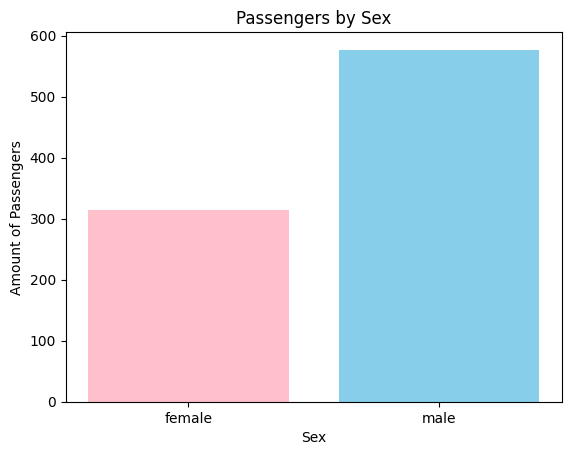

In [106]:
df_sex = df.groupby('Sex', as_index=False).count()

plt.bar(df_sex.Sex, df_sex.PassengerId, color=['pink', 'skyblue'])

plt.title("Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Amount of Passengers")
plt.show()


แสดงกราฟวงกลมเปรียบเทียบจำนวนผู้โดยสาร ในแต่ละ Class

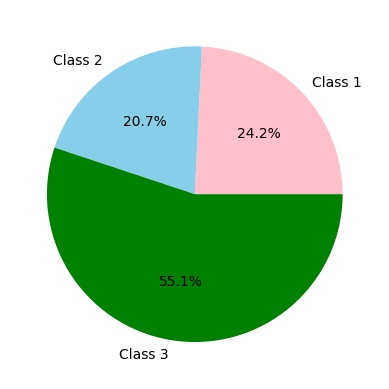

In [125]:
df_class = df.groupby('Pclass', as_index=False).count()

df_class['Pclass'] = 'Class '  + df_class['Pclass'].astype(str)
plt.pie(
    df_class.PassengerId[:3], labels=df_class.Pclass[:3], autopct='%1.1f%%',
    colors=['pink', 'skyblue', 'green'],
)

plt.show()

แสดงกราฟเส้นค่าเฉลี่ย อายุ กับ ค่าโดยสาร

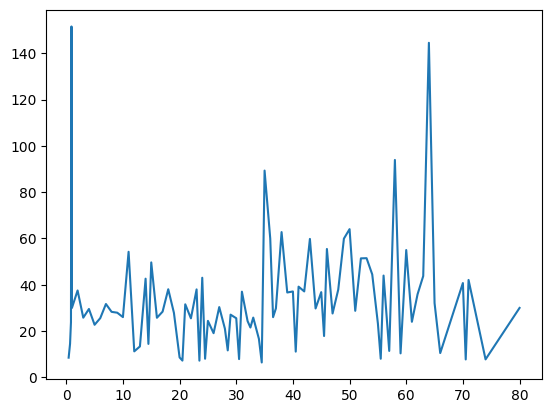

In [275]:
df_age_fare = df.groupby('Age', as_index=False).agg({'Fare': pd.Series.mean})


plt.plot(df_age_fare.Age, df_age_fare.Fare)
plt.show()


In [126]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedText
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Yes


แสดงกราฟฮิสโตแกรมอายุผู้โดยสารของเรือ Titanic

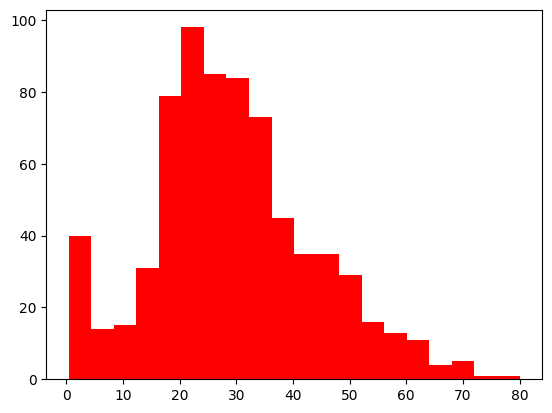

In [161]:
plt.hist(df.Age, color='red', bins=20)

plt.show()

แสดงกราฟฮิสโตแกรมอายุผู้โดยสาร ผู้รอดชีวิต VS ผู้เสียชีวิต

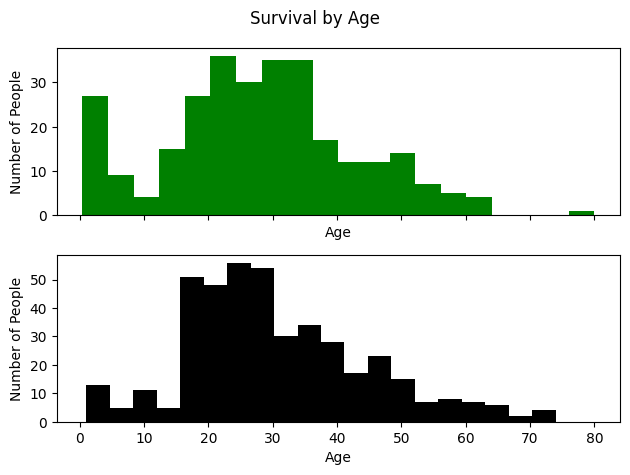

In [177]:
df_survived_yes = df[df['Survived'] == 1]
df_survived_no = df[df['Survived'] == 0]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(df_survived_yes.Age, color='green', bins=20)
ax2.hist(df_survived_no.Age, color='black', bins=20)

ax1.set_ylabel('Number of People')
ax1.set_xlabel('Age')
ax2.set_ylabel('Number of People')
ax2.set_xlabel('Age')


fig.suptitle('Survival by Age')

fig.tight_layout()
plt.show()

แสดงกราฟแบบจุด ความสัมพันธ์ระหว่าง อายุ กับ ค่าโดยสาร

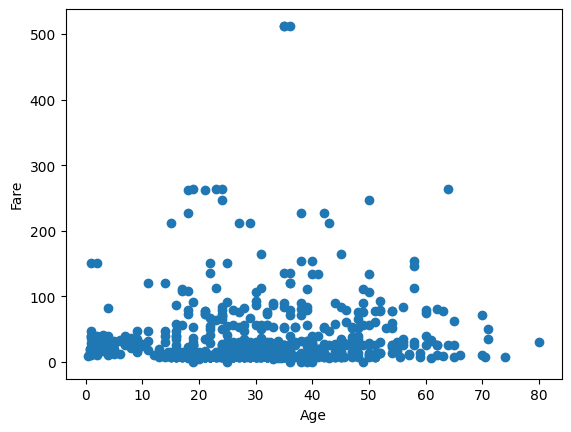

In [200]:
plt.scatter(df.Age, df.Fare)

plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

แสดงกราฟแบบจุด ความสัมพันธ์ระหว่าง คลาส กับ ค่าโดยสาร

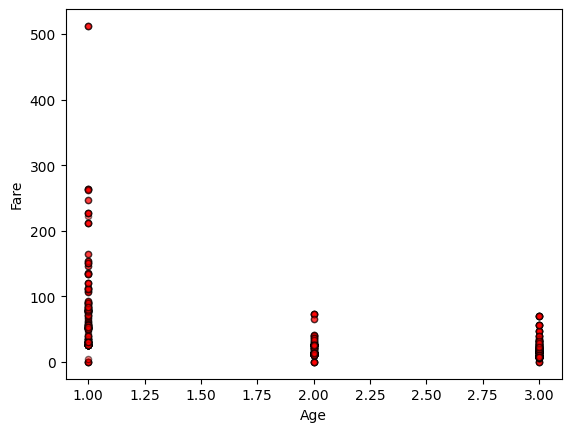

In [199]:
plt.scatter(df.Pclass, df.Fare, color='red', alpha=0.5, label='Pclass', s=20, edgecolors='black')

plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

แสดงกราฟจุด แสดงความสัมพันธ์ คลาส ค่าโดยสาร และ ท่าเรือ

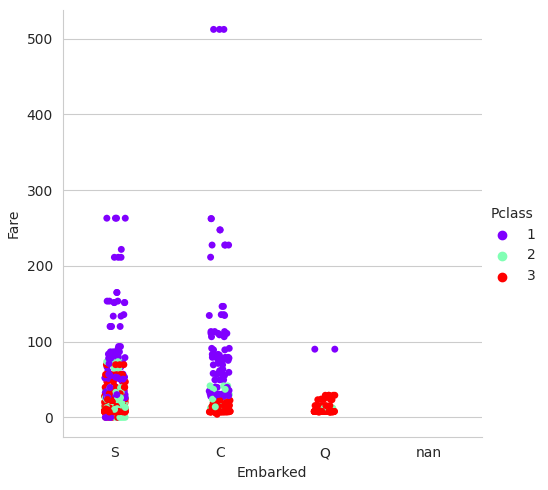

In [211]:
with sns.axes_style("whitegrid"):
    sns.catplot(x = 'Embarked', y = 'Fare', hue = 'Pclass', data = df, palette = 'rainbow')
plt.show()

แสดงกราฟจุด แสดงความสัมพันธ์ ค่าโดยสาร ท่าเรือ และ การรอดชีวิต

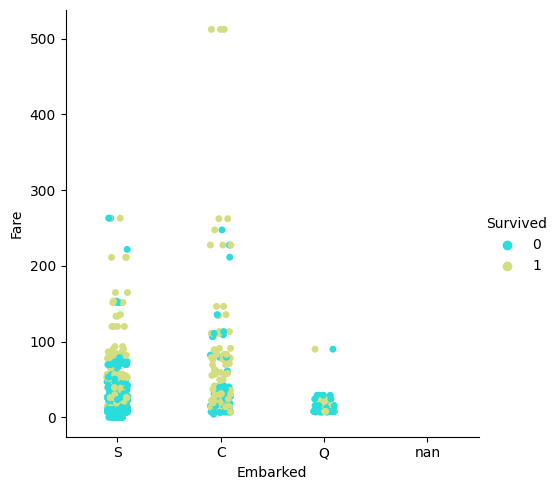

In [238]:
sns.catplot(x = 'Embarked', y = 'Fare', hue = 'Survived', data = df, palette = 'rainbow')
plt.show()

แสดงกราฟจุด แสดงความสัมพันธ์ ค่าโดยสาร เพศ และ คลาส

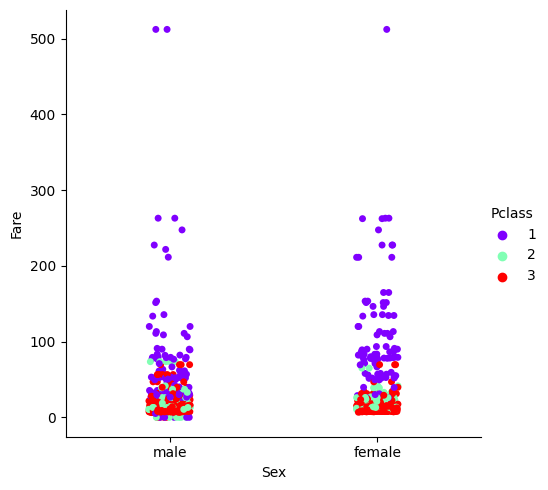

In [219]:
sns.catplot(x = 'Sex', y = 'Fare', hue = 'Pclass', data = df, palette = 'rainbow')

plt.show()

แสดงกราฟจุด แสดงความสัมพันธ์ เพศ ค่าโดยสาร และ การรอดชีวิต

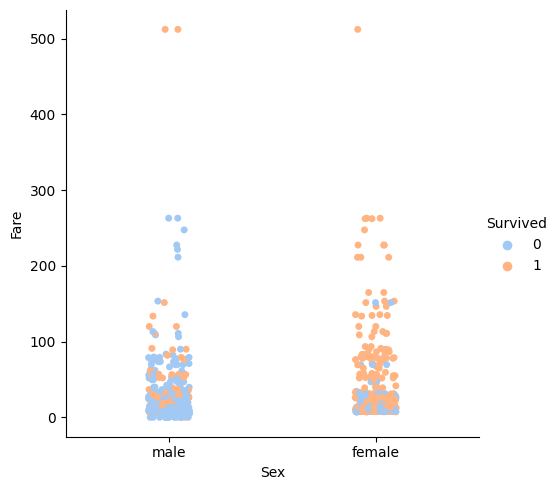

In [221]:
sns.catplot(x = 'Sex', y = 'Fare', hue = 'Survived', data = df, palette = 'pastel')
plt.show()

แสดงกราฟจุด แสดงความสัมพันธ์ เพศ อายุ และ การรอดชีวิต

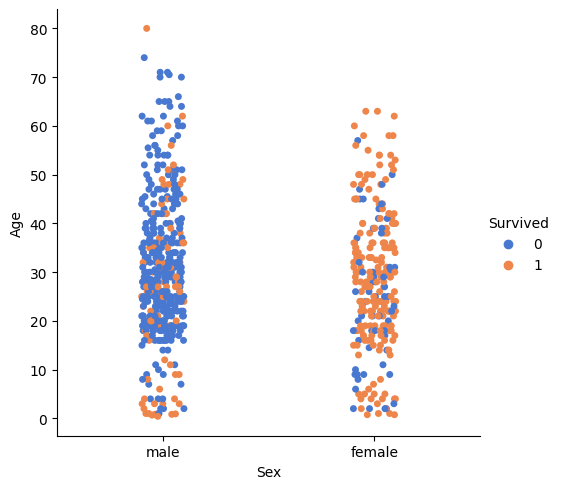

In [223]:
sns.catplot(x='Sex', y="Age",hue = 'Survived', data = df, palette = 'muted')

plt.show()

แสดงการเปรียบเทียบการรอดชีวิตจากคลาส

In [228]:
df.groupby(by=['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

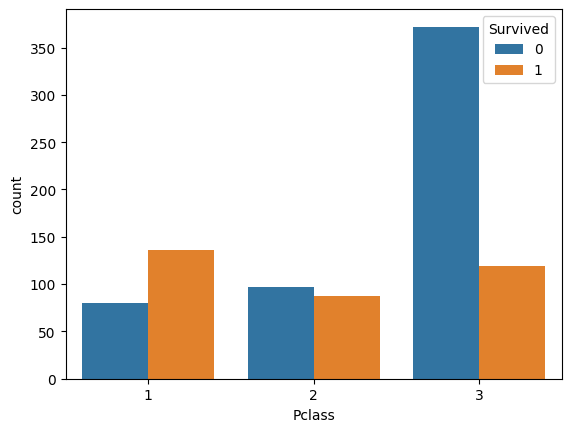

In [239]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.show()


In [245]:
df_pclass_survived = df.groupby(by=['Pclass','Survived'])['Pclass'].count()
class_1 = df_pclass_survived[1][1]/(df_pclass_survived[1][0]+df_pclass_survived[1][1])*100
class_2 = df_pclass_survived[2][1]/(df_pclass_survived[2][0]+df_pclass_survived[2][1])*100
class_3 = df_pclass_survived[3][1]/(df_pclass_survived[3][0]+df_pclass_survived[3][1])*100
print(f'{class_1} % in 1st class [survived]')
print(f'{class_2} % in 2nd class [survived]')
print(f'{class_3} % in 3rd class [survived]')

62.96296296296296 % in 1st class [survived]
47.28260869565217 % in 2nd class [survived]
24.236252545824847 % in 3rd class [survived]


แสดงอัตราการรอดชีวิตจากคลาส

In [242]:
df_pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

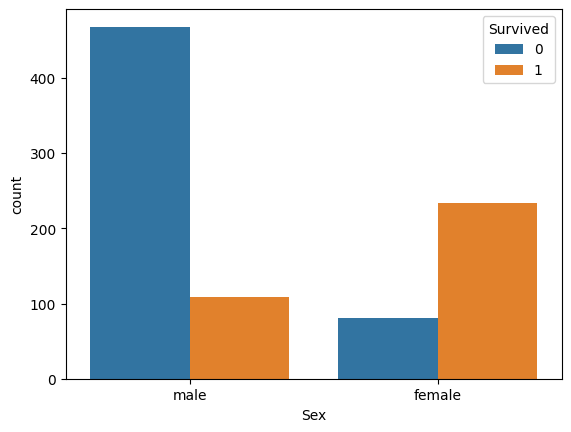

In [234]:
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

In [247]:
df_sex_survived = df.groupby(by=['Sex','Survived'])['Sex'].count()
males = df_sex_survived['male'][1] / (df_sex_survived['male'][0] + df_sex_survived['male'][1])*100
females = df_sex_survived['female'][1] / (df_sex_survived['female'][0] + df_sex_survived['female'][1]) * 100
print(f'{males}% of Males [survived]')
print(f'{females}% of Females [survived]')

18.890814558058924% of Males [survived]
74.20382165605095% of Females [survived]


แสดงกราฟแบบ Box ความสัมพันธ์ระหว่าง Sex, Age

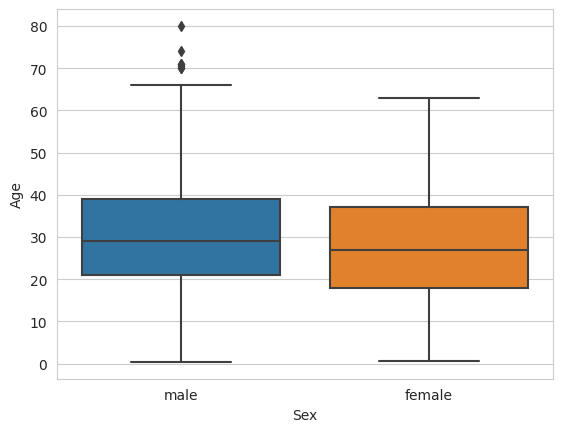

In [261]:

with sns.axes_style("whitegrid"):
    sns.boxplot(data=df, x="Sex", y="Age")
plt.show()

แสดงกราฟแบบ Box ความสัมพันธ์ระหว่าง Pclass, Fare

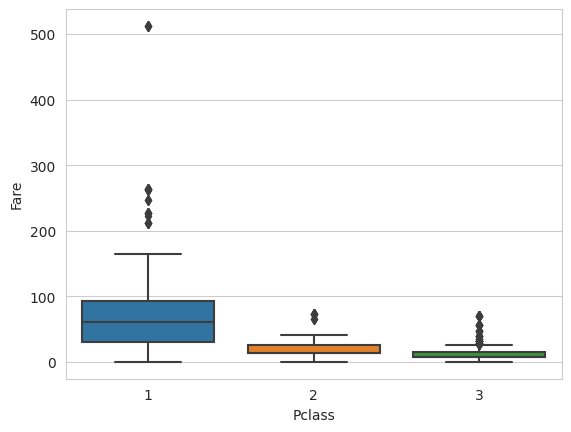

In [257]:

with sns.axes_style("whitegrid"):
    sns.boxplot(data=df, x="Pclass", y="Fare")
plt.show()